In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
ERROR:root:File `'functions.py'` not found.


In [3]:
pd.set_option('display.max_columns', None)
label= pd.read_csv('traininglabels.csv')
value= pd.read_csv('trainingvalues.csv')
df = pd.merge(label, value, on='id')

In [4]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
df.shape

(59400, 41)

In [6]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Management 

In [29]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

No null values in manangement. Scheme management represents who is opertating the waterpoint. Management represents how the the water point is manages. Therefore we can drop the 'scheme managment' column.

In [30]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

Status Group

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


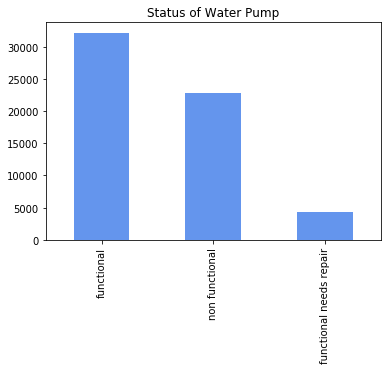

In [52]:
df['status_group'].value_counts().plot(kind='bar', color='cornflowerblue',title='Status of Water Pump')
print(df['status_group'].value_counts())

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64


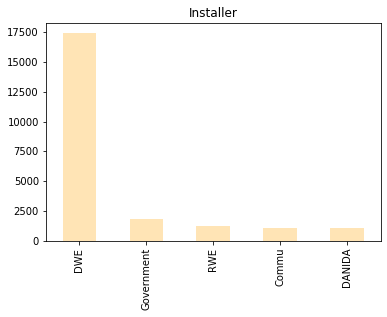

In [57]:
df['installer'].value_counts().nlargest(n=5).plot(kind='bar',color='moccasin',title='Installer')
print(df['installer'].value_counts().nlargest(n=5))

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Name: funder, dtype: int64


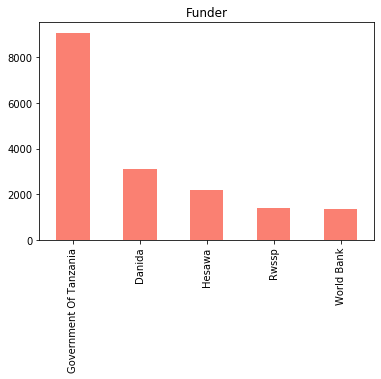

In [61]:
df['funder'].value_counts().nlargest(n=5).plot(kind='bar',color='salmon',title='Funder')
print(df['funder'].value_counts().nlargest(n=5))

In [31]:
df.columns[df.isna().any()].tolist()

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [43]:
df[df['installer'].isnull()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
34,41583,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,Rufiji,Kilombero B,Pwani,60,63,Mafia,Baleni,100,True,GeoData Consultants Ltd,VWC,NaN,False,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
43,19282,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,Internal,Mwarufyu,Singida,13,2,Singida Rural,Merya,1,True,GeoData Consultants Ltd,VWC,K,NaN,1980,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
47,13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
65,51072,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,Internal,Mfumbu,Singida,13,2,Singida Rural,Naintiri,1,True,GeoData Consultants Ltd,VWC,M,NaN,1970,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
71,17386,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,Rufiji,Lembuka,Mbeya,12,7,Mbarali,Mawindi,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59357,46563,0.0,2013-02-19,NaN,1635,NaN,34.971841,-5.098362,Shabani,0,Internal,Mampando A,Singida,13,2,Singida Rural,Ntuntu,1,True,GeoData Consultants Ltd,VWC,NaN,NaN,1980,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
59366,55232,0.0,2013-02-02,NaN,1541,NaN,34.765729,-5.027725,Joshoni,0,Internal,Mungumaho,Singida,13,2,Singida Rural,Puma,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2000,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59370,14796,200.0,2013-01-29,NaN,1154,NaN,30.058731,-4.902633,Village Office,0,Lake Tanganyika,Mazungwe,Kigoma,16,2,Kasulu,Rusesa,1,True,GeoData Consultants Ltd,NaN,NaN,False,0,other,other,other,unknown,unknown,pay monthly,monthly,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other,functional
59376,34716,0.0,2013-02-03,NaN,1581,NaN,34.821039,-5.076258,Nasingo,0,Internal,Hu,Singida,13,2,Singida Rural,Dung'unyi,1,True,GeoData Consultants Ltd,VWC,NaN,NaN,1990,other,other,other,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other,non functional


In [ ]:
JFK.groupby('OP_UNIQUE_CARRIER').agg({'AIR_TIME': ['mean']})
